# Исследование рынка квартир



В данном проекте рассматриваются данные сервиса по продаже недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо провести EDA.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Первичный анализ датасета

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data.csv", sep='\t')
print("Размер набора данных:", df.shape)
df.head()

Размер набора данных: (23699, 22)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

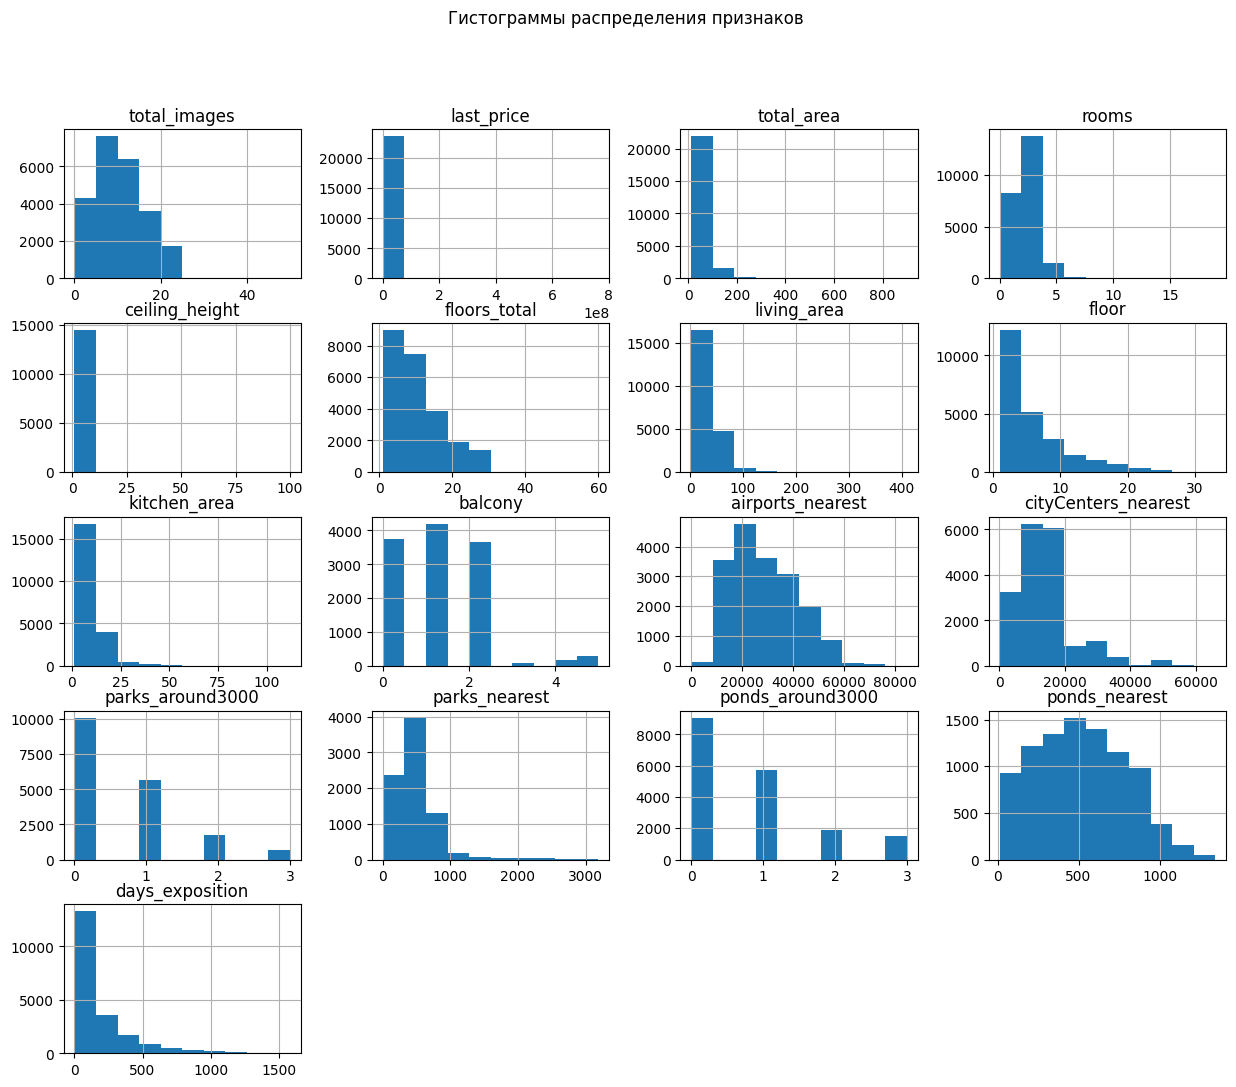

In [ ]:
df.hist(figsize=(15,12))
plt.suptitle("Гистограммы распределения признаков")
plt.show()

*Вывод*: на построенных гистограммах видно наличие выбросов и нелогичных значений

## Предобработка данных

In [ ]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [ ]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['locality_name'] = df['locality_name'].fillna("Unknown")

Так как данные столбцы обозначают наличие того или иного признака, можем пропущенных значения заменить на 0.

Остальные же значения, обозначенные в метрах квадратных, мы не можем так заполнить, так как не можем их предположить

Столбец locality_name будет использоваться и дальше, соответственно я заменила пропущенные значения



*Причина возможных появлений пропусков:* человеческий фактор (пропустили/забыли написать) или сбой в системе

In [ ]:
df[df['parks_around3000'] == 0].head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [ ]:
df.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


In [ ]:
df['parks_around3000'] = df['parks_around3000'].astype('int32')
df['ponds_around3000'] = df['ponds_around3000'].astype('int32')

**Объяснение изменения типов данных:**

Метраж, цена могут быть дробными числами, поэтому тип данных float64 в соответствующих столбцах не менялся

Но количество объектов может быть только целочисленным, поэтому в столбцах parks_around3000, ponds_around3000 был изменен тип данных на int32

In [ ]:
df["locality_name"].unique(), len(df["locality_name"].unique())

(array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
        'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
        'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
        'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
        'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
        'деревня Новое Девяткино', 'посёлок Металлострой',
        'посёлок городского типа Лебяжье',
        'посёлок городского типа Сиверский', 'поселок Молодцово',
        'поселок городского типа Кузьмоловский',
        'садовое товарищество Новая Ропша', 'Павловск',
        'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
        'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
        'поселок городского типа Ефимовский', 'посёлок Плодовое',
        'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
        'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
        'дерев

Найдены неявные дубликаты: Мурино посёлок, Мурино поселок, Мурино, поселок городского типа Рябово, посёлок городского типа Рябово, поселок Рябово, посёлок Пансионат Зелёный Бор, поселок Пансионат Зелёный Бор и т.д.

In [ ]:
from collections import Counter

def count_word_frequency(df, column_name):
    words = []
    for text in df[column_name].astype(str):
        words.extend(text.split())

    word_counts = Counter(words)
    sorted_counts = sorted(word_counts.items(), key=lambda x: (-x[1], x[0]))

    return [f"{word} - {count}" for word, count in sorted_counts]

In [ ]:
unique_localities = df["locality_name"].unique()

temp_df = pd.DataFrame({"locality_name": unique_localities})

result = count_word_frequency(temp_df, "locality_name")

print(result)

['поселок - 107', 'деревня - 106', 'посёлок - 94', 'городского - 39', 'типа - 39', 'городской - 14', 'село - 9', 'Бор - 8', 'станции - 8', 'Старая - 5', 'товарищество - 5', 'Большая - 4', 'садовое - 4', 'Мурино - 3', 'Новый - 3', 'Павлово - 3', 'Рощино - 3', 'Рябово - 3', 'имени - 3', 'коттеджный - 3', 'Аннино - 2', 'Бегуницы - 2', 'Бугры - 2', 'Вещево - 2', 'Возрождение - 2', 'Вырица - 2', 'Гаврилово - 2', 'Гарболово - 2', 'Горка - 2', 'Громово - 2', 'Жилгородок - 2', 'Зелёный - 2', 'Зимитицы - 2', 'Ижора - 2', 'Ильичёво - 2', 'Калитино - 2', 'Кобралово - 2', 'Колпаны - 2', 'Коробицыно - 2', 'Красная - 2', 'Красный - 2', 'Кудрово - 2', 'Кузьмоловский - 2', 'Ладога - 2', 'Лебяжье - 2', 'Лесное - 2', 'Лесогорский - 2', 'Лисий - 2', 'Любань - 2', 'Малое - 2', 'Малукса - 2', 'Мга - 2', 'Мельниково - 2', 'Мичуринское - 2', 'Назия - 2', 'Никольское - 2', 'Новая - 2', 'Нос - 2', 'Пансионат - 2', 'Перово - 2', 'Петровское - 2', 'Победа - 2', 'Поляны - 2', 'Приветнинское - 2', 'Приладожский - 

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок городского типа')
df['locality_name'] = df['locality_name'].replace('Мурино', 'поселок Мурино')
df['locality_name'] = df['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')

Так как 'городской поселок' = 'поселок городского типа', было решено исправить все подобные поля на 'поселок городского типа', чтобы устранить дубликаты

In [ ]:
df["locality_name"].unique(), len(df["locality_name"].unique())

(array(['Санкт-Петербург', 'поселок Шушары',
        'поселок городского типа Янино-1', 'поселок Парголово',
        'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
        'деревня Кудрово', 'Коммунар', 'Колпино',
        'поселок городского типа Красный Бор', 'Гатчина',
        'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
        'деревня Новое Девяткино', 'поселок Металлострой',
        'поселок городского типа Лебяжье',
        'поселок городского типа Сиверский', 'поселок Молодцово',
        'поселок городского типа Кузьмоловский',
        'садовое товарищество Новая Ропша', 'Павловск',
        'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
        'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
        'поселок городского типа Ефимовский', 'поселок Плодовое',
        'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
        'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
        'деревня Л

**Вывод:** после удаления неявных дубликатов количество уникальных значений столбца 'locality_name' сократилось с 365 до 322

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [ ]:
df['rooms'].max(), df['rooms'].mean(), df['rooms'].min()

(19, np.float64(2.070635891809781), 0)

In [ ]:
df['living_area'].max(), df['living_area'].mean(), df['living_area'].min()

(409.7, np.float64(34.457852427601395), 2.0)

In [ ]:
df['ceiling_height'].max(), df['ceiling_height'].mean(), df['ceiling_height'].min()

(100.0, np.float64(2.77149889685604), 1.0)

In [ ]:
df = df.query('rooms <= 4 and living_area <= 100 and ceiling_height <= 35 and living_area >= 20 and ceiling_height >= 2')

Вывод: были расчитаны средние, максимальные и минимальные значения столбцов, где могли находиться экстремальные значения.

Методом query() была произведена фильтрация строк для очистки data

### Добавление новых столбцов в таблицу

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0
10,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,NaN,...,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0
13,20,3550000.0,42.8,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,NaN,...,5.2,1.0,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0


In [ ]:
df['price_for_meter'] = (df['last_price'] / df['total_area']).round(2)

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['day_exposition'] = df['first_day_exposition'].dt.dayofweek
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

In [ ]:
def determine_floor_type(row):
    if row['floor'] == 1:
        return 'Ground'
    elif row['floor'] == row['floors_total']:
        return 'Top'
    else:
        return 'Other'
df['type_floor'] = df.apply(determine_floor_type, axis=1)

In [ ]:
df['city_center_km'] = df['cityCenters_nearest'].apply(lambda x: round(x / 1000) if pd.notna(x) else np.nan)

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition,type_floor,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2,755.0,NaN,120370.37,3,3,2019,Other,16.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1,48.0,121.0,100000.00,1,6,2018,Other,8.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,NaN,0,NaN,289.0,88524.59,6,2,2017,Other,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,310.0,2,553.0,137.0,127525.25,3,11,2017,Other,14.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,NaN,...,294.0,3,298.0,366.0,82943.93,5,7,2017,Top,33.0


## EDA

Список параметров:
- общая площадь
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолков
- тип этажа квартиры («Ground»,  «Top»,  «Other»)
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего парка

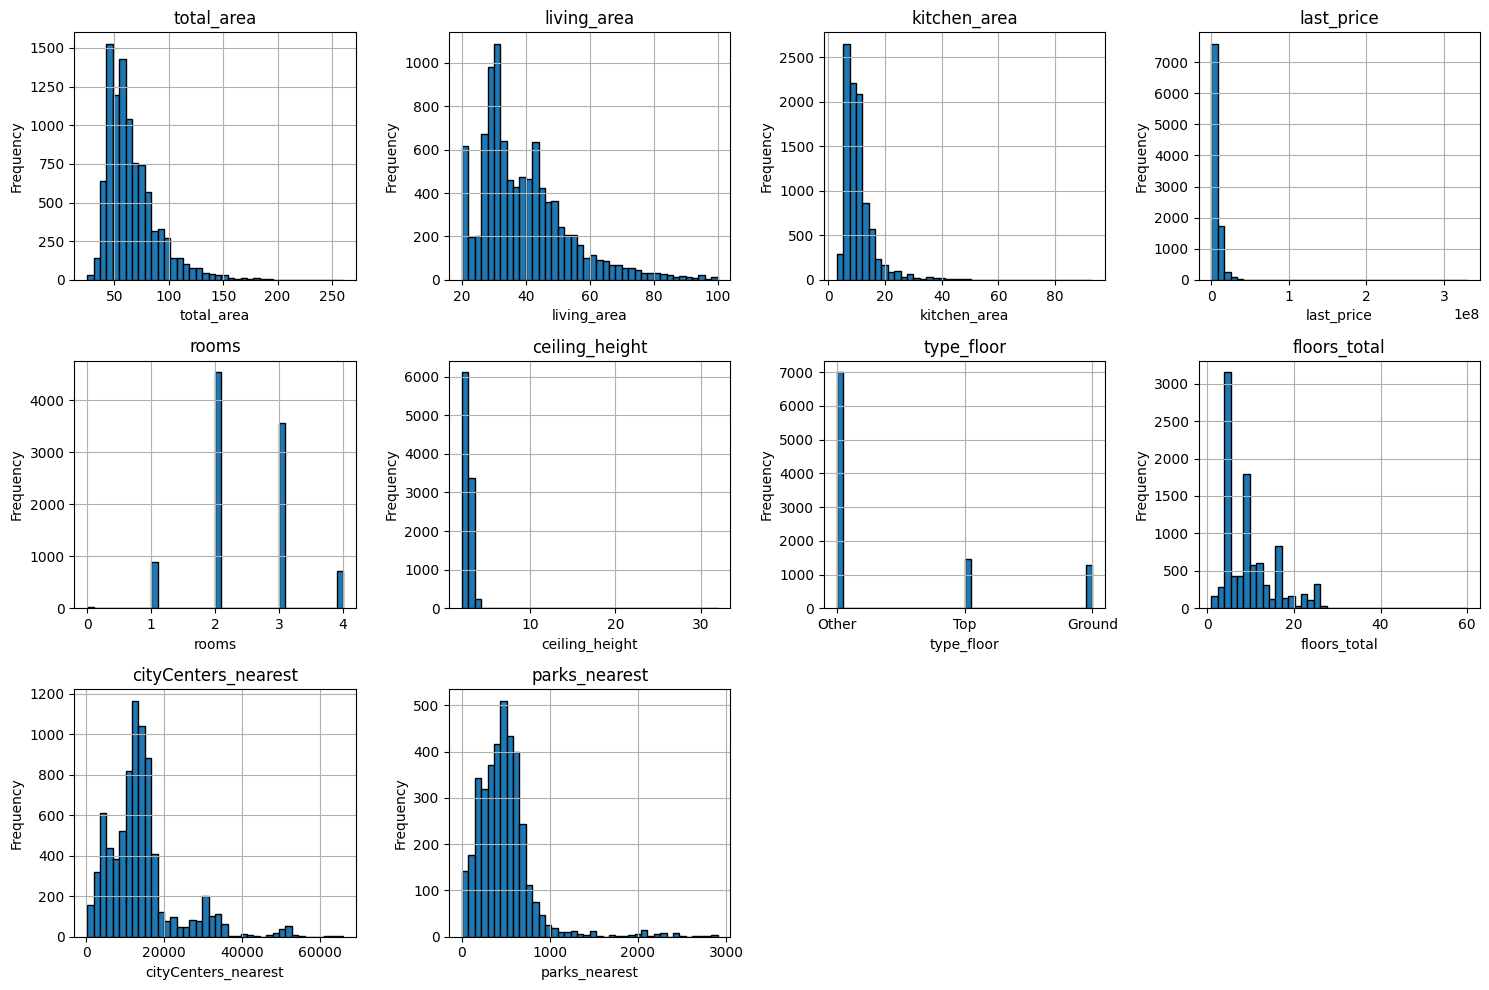

In [ ]:
columns_to_plot = [
    'total_area',
    'living_area',
    'kitchen_area',
    'last_price',
    'rooms',
    'ceiling_height',
    'type_floor',
    'floors_total',
    'cityCenters_nearest',
    'parks_nearest'
]

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 4, i + 1)
    df[column].hist(bins=40, edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

In [ ]:
df['total_area'].max()

260.0

Анализ экстремальных значений(выбросов)

- total_area: выбросы при > 150 м.
- living_area: обработано на предыдущем этапе
- kitchen_area: выбросы при > 40 м.
- last_price: выбросы при > 0.4 * 10^8
- ceiling_height: логическое изменение экстремальных значением путём деления на 10
- floors_total: выбросы при > 30
- cityCenters_nearest: выбросы при > 55000 м.
- parks_nearest: выбросы при > 2000 м.

In [ ]:
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x / 10 if x >= 20 else x)

In [ ]:
df = df.query('total_area <= 150 and kitchen_area <= 40 and last_price <= 40000000 and ceiling_height <= 3.5 and cityCenters_nearest <= 55000 and parks_nearest <= 15000')

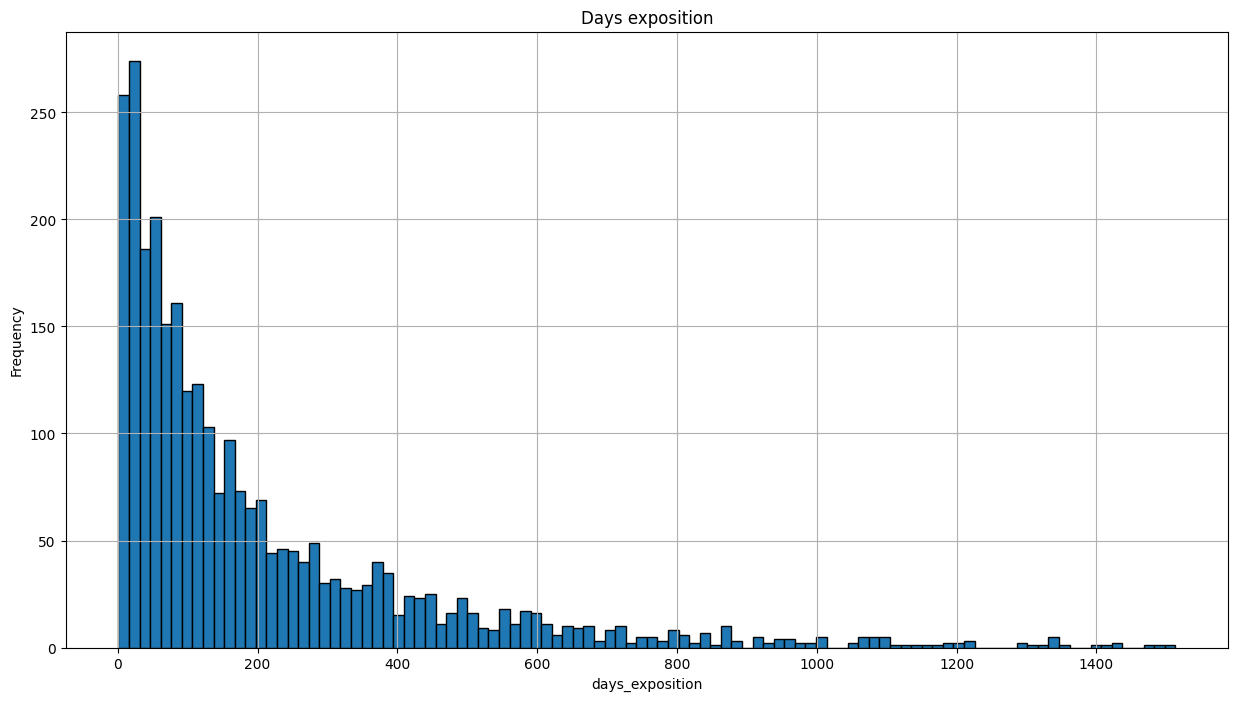

In [ ]:
df['days_exposition'].hist(bins = 100, figsize=(15,8), edgecolor='black')
plt.title('Days exposition')
plt.xlabel('days_exposition')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(df['days_exposition'].mean(), df['days_exposition'].min(),  df['days_exposition'].median())

201.49946789641717 1.0 114.0


In [ ]:
quantile_15 = df['days_exposition'].quantile(0.15)
quantile_85 = df['days_exposition'].quantile(0.85)

print(f"15-й квантиль: {quantile_15}")
print(f"85-й квантиль: {quantile_85}")

15-й квантиль: 26.0
85-й квантиль: 392.2999999999997


*Возможные причины возникновения выбросов:*
1. Системный сбой
2. Человеческий фактор, неправильно указали количество дней, если эти данные заполнялись вручную


*Объяснение:*
среднее более чуствительно к выбросам, поэтому я буду оперировать медианой
1. Среднее время продажи ~114 дней
2. Экстремально быстрые продажи до 26 дней
3. Экстремально долгие от 392 дней

In [ ]:
df.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition,type_floor,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,482.0,2,755.0,NaN,120370.37,3,3,2019,Other,16.0


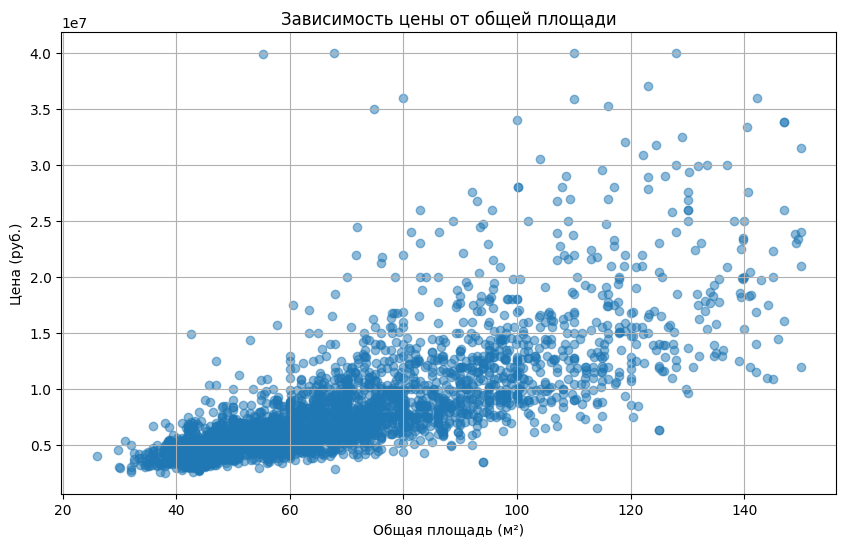

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["total_area"], df["last_price"], alpha=0.5)
plt.title("Зависимость цены от общей площади")
plt.xlabel("Общая площадь (м²)")
plt.ylabel("Цена (руб.)")
plt.grid()
plt.show()

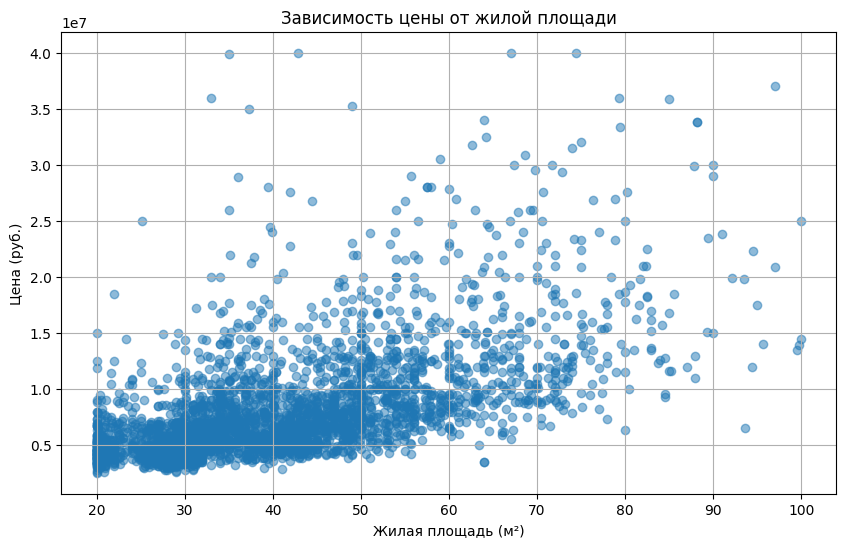

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["living_area"], df["last_price"], alpha=0.5)
plt.title("Зависимость цены от жилой площади")
plt.xlabel("Жилая площадь (м²)")
plt.ylabel("Цена (руб.)")
plt.grid()
plt.show()

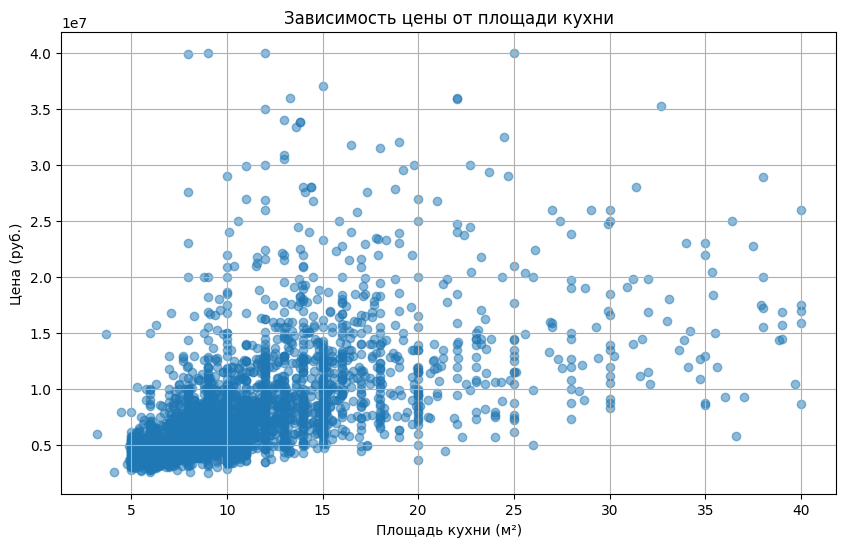

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["kitchen_area"], df["last_price"], alpha=0.5)
plt.title("Зависимость цены от площади кухни")
plt.xlabel("Площадь кухни (м²)")
plt.ylabel("Цена (руб.)")
plt.grid()
plt.show()

*Вывод:* исходя из графиков, можем сделать вывод о том, что присутствует линейная зависимость между ценой и метражем (общей площадью, жилой площадью, кухонной площадью)

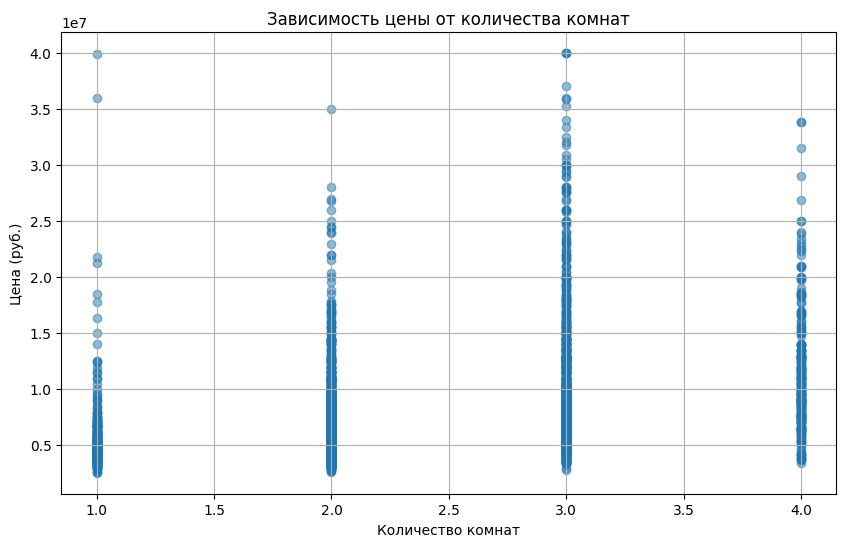

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["rooms"], df["last_price"], alpha=0.5)
plt.title("Зависимость цены от количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Цена (руб.)")
plt.grid()
plt.show()

Из получившегося графика можем сделать вывод, что в данном случае лучше подойдёт не диаграмма рассеивания, а box-and-whiskers

<Figure size 1000x600 with 0 Axes>

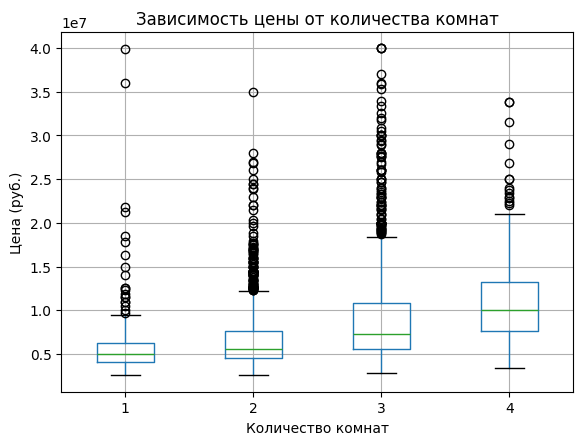

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot(column="last_price", by="rooms", grid=False)
plt.title("Зависимость цены от количества комнат")
plt.suptitle('')
plt.xlabel("Количество комнат")
plt.ylabel("Цена (руб.)")
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

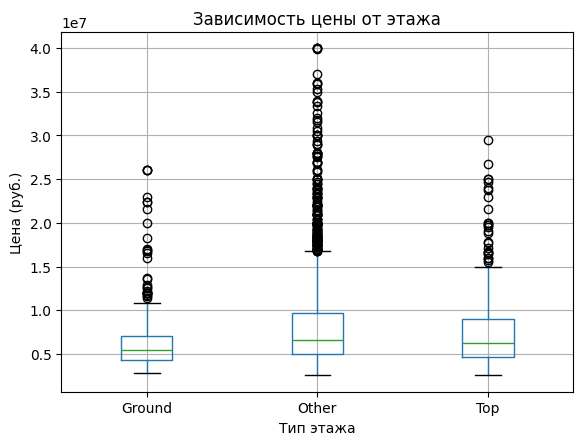

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot(column="last_price", by="type_floor", grid=False)
plt.title("Зависимость цены от этажа")
plt.suptitle('')
plt.xlabel("Тип этажа")
plt.ylabel("Цена (руб.)")
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

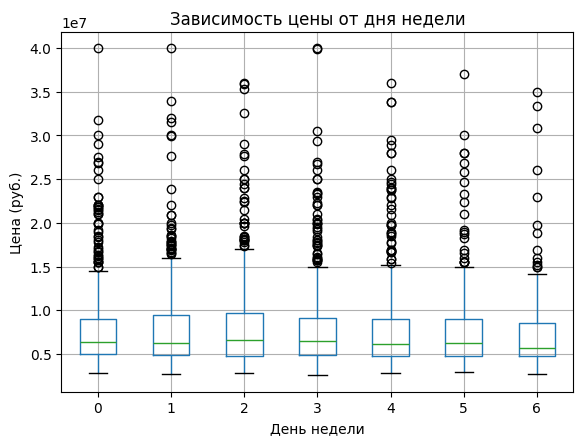

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='last_price', by='day_exposition', grid=False)
plt.title('Зависимость цены от дня недели')
plt.suptitle('')
plt.xlabel('День недели')
plt.ylabel('Цена (руб.)')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

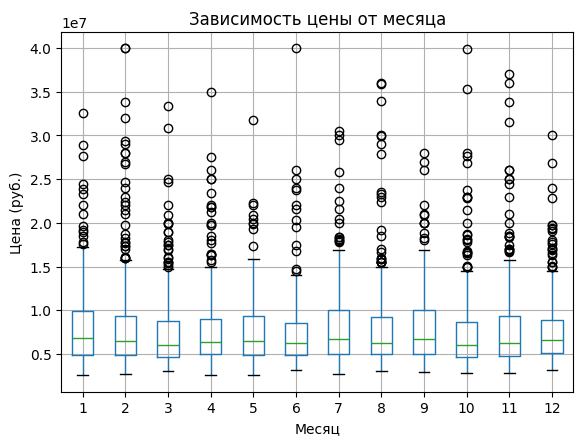

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='last_price', by='month_exposition', grid=False)
plt.title('Зависимость цены от месяца')
plt.suptitle('')
plt.xlabel('Месяц')
plt.ylabel('Цена (руб.)')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

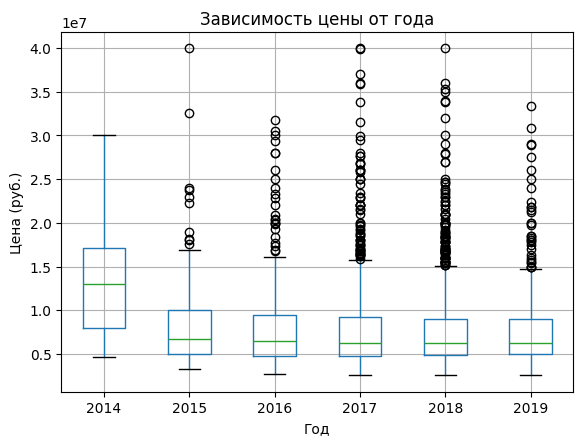

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='last_price', by='year_exposition', grid=False)
plt.title('Зависимость цены от года')
plt.suptitle('')
plt.xlabel('Год')
plt.ylabel('Цена (руб.)')
plt.grid()
plt.show()

**Вывод:**
Цена больше всего зависит от параметров, связанных с метражем:

1. общей площади
2. жилой площади
3. площади кухни

Связь линейная: чем больше цена, тем больше метраж

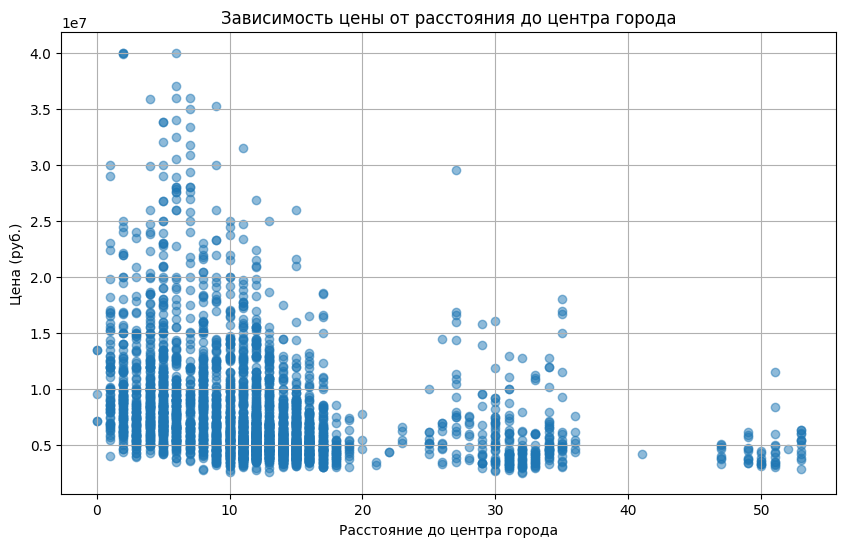

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["city_center_km"], df["last_price"], alpha=0.5)
plt.title("Зависимость цены от расстояния до центра города")
plt.xlabel("Расстояние до центра города")
plt.ylabel("Цена (руб.)")
plt.grid()
plt.show()

Исходя из этого графика можем сделать вывод, что чем меньше расстояние от центра, тем выше стоимость недвижимости, однако, давайте проверим этот вывод с помощью графика на какои-нибудь конкретном примере города


Исключим те данные, где locality_name == 'Unknown'

In [ ]:
filtered_df = df[df["locality_name"] != 'Unknown']

pivot_table = filtered_df.groupby("locality_name").agg (
        number_of_listings=("last_price", "count"),
        average_price_for_meter=("price_for_meter", 'mean')
        ).reset_index()
pivot_table

,locality_name,number_of_listings,average_price_for_meter
0,Зеленогорск,8,105947.951250
1,Колпино,47,71856.186596
2,Красное Село,14,71533.545000
3,Кронштадт,37,77867.722973
4,Ломоносов,5,65634.412000
5,Павловск,9,104186.201111
6,Петергоф,63,84634.123968
7,Пушкин,90,105363.318444
8,Санкт-Петербург,3138,114617.828642
9,Сестрорецк,36,105615.681944


In [ ]:
top_localities = pivot_table.nlargest(10, 'number_of_listings').reset_index(drop=True)
top_localities

,locality_name,number_of_listings,average_price_for_meter
0,Санкт-Петербург,3138,114617.828642
1,Пушкин,90,105363.318444
2,Петергоф,63,84634.123968
3,Колпино,47,71856.186596
4,Кронштадт,37,77867.722973
5,Сестрорецк,36,105615.681944
6,Красное Село,14,71533.545000
7,Павловск,9,104186.201111
8,Зеленогорск,8,105947.951250
9,Ломоносов,5,65634.412000


In [ ]:
highest_price_locality = top_localities.loc[top_localities['average_price_for_meter'].idxmax()]
lowest_price_locality = top_localities.loc[top_localities['average_price_for_meter'].idxmin()]

In [ ]:
print("Населённый пункт с самой высокой стоимостью квадратного метра:")
print(highest_price_locality)

print("Населённый пункт с самой низкой стоимостью квадратного метра:")
print(lowest_price_locality)

Населённый пункт с самой высокой стоимостью квадратного метра:
locality_name              Санкт-Петербург
number_of_listings                    3138
average_price_for_meter      114617.828642
Name: 0, dtype: object
Населённый пункт с самой низкой стоимостью квадратного метра:
locality_name              Ломоносов
number_of_listings                 5
average_price_for_meter    65634.412
Name: 9, dtype: object


Больше всего данных по городу Санкт-Петербург, возьмём его для примера

In [ ]:
spb_df = df[df['locality_name'] == 'Санкт-Петербург']

In [ ]:
average_price_by_distance = (
    spb_df.groupby('city_center_km')['last_price'].mean().reset_index()
)
average_price_by_distance.columns = ['distance_km', 'average_price']
average_price_by_distance.head(10)

,distance_km,average_price
0,0.0,1.019800e+07
1,1.0,1.145462e+07
2,2.0,1.111262e+07
3,3.0,9.070784e+06
4,4.0,1.048559e+07
5,5.0,1.049325e+07
6,6.0,1.084233e+07
7,7.0,1.080603e+07
8,8.0,9.818939e+06
9,9.0,8.480968e+06


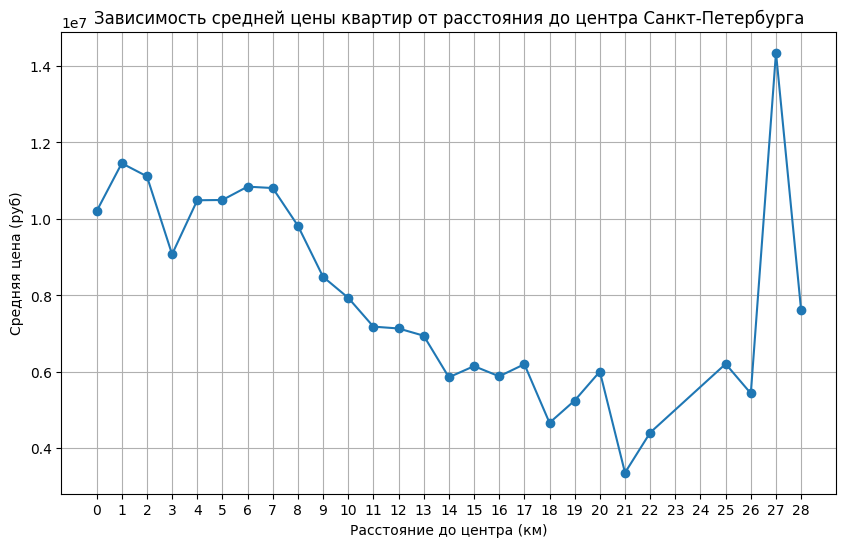

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(average_price_by_distance['distance_km'], average_price_by_distance['average_price'], marker='o')
plt.title('Зависимость средней цены квартир от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена (руб)')
plt.grid()
plt.xticks(range(int(average_price_by_distance['distance_km'].max()) + 1))
plt.show()

In [ ]:
spb_df.query('city_center_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_exposition,month_exposition,year_exposition,type_floor,city_center_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,NaN,...,1496.0,0,NaN,128.0,193918.92,1,11,2017,Other,27.0


**Анализ результатов**

Есть зависимость: чем меньше расстояние до центра - тем выше цена

Однако, на расстояние 27 км есть экстремальное значение

Может быть выброс, либо квартира в элитном жилом комплексе/элитный дом

# Отчёт о проделанной работе

- **Этап 1**
На первом этапе был изучен датасет, ознакомление с его структурой и содержимым. Бла собрана общая информацию о столбцах и типах данных, а также построены гистограммы для всех числовых переменных.

- **Этап 2**
На втором этапе была выполнена предобработке данных. Удалены явные дубликаты, что обеспечило уникальность записей в датафрейме. Также была проведена работа с неявными дубликатами, которые могли повлиять на анализ. Также были заполнены нулевые значения в тех столбцах, где это было возможно. Также этот этап включал добавление новых столбцов в датафрейм, что позволило расширить объем информации для анализа.

- **Этап 3**
На третьем этапе был проведен исследовательский анализ данных:

1. *Анализ экстремальных значений(выбросов)*
с помощью построенных гистограмм

total_area: выбросы при >150м

living_area: уже обработано на прошлом этапе

kitchen_area: выбросы >40м

last_price: выбросы >0.4 * 10^8

ceiling_height: логическое изменение экстремальных значений путем деления на 10

cityCenters_nearest: выбросы >55000м

parks_nearest: выбросы >15000м

2. *Анализ среднего времени продажи*

с помощью медианных значений и квантилей

Среднее время продажи ~114 дней

Экстремально быстрые продажи до 26 дней

Экстремально долгие от 392 дней

3. *Анализ зависимости цены от параметров*

Цена больше всего зависит от параметров, связанных с метражем:

общей площади

жилой площади

площади кухни

4. *Анализ средней цены квадратного метра для населенных пунктов с наибольшем количеством объявлений*

Населённый пункт с самой высокой стоимостью квадратного метра:

Санкт-Петербург

средняя цена за квадратный метр: 114617.828642

Населённый пункт с самой низкой стоимостью квадратного метра:

Ломоносов

средняя цена за квадратный метр: 65634.412

5. *Анализ зависимости цены от расстояния до центра Санкт-Петербурга (км)*

Есть зависимость: чем меньше расстояние до центра - тем выше цена
